# Сборный проект

**Описание проекта:**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Открытие файла с данными и изучение общей информации

In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from scipy import stats as st

In [3]:
# чтение файла с данными и сохранение в df
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/games.csv')

In [4]:
df.head(10) # получение первых 10 строк таблицы df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
df.info()# получение общей информации о данных в таблице df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


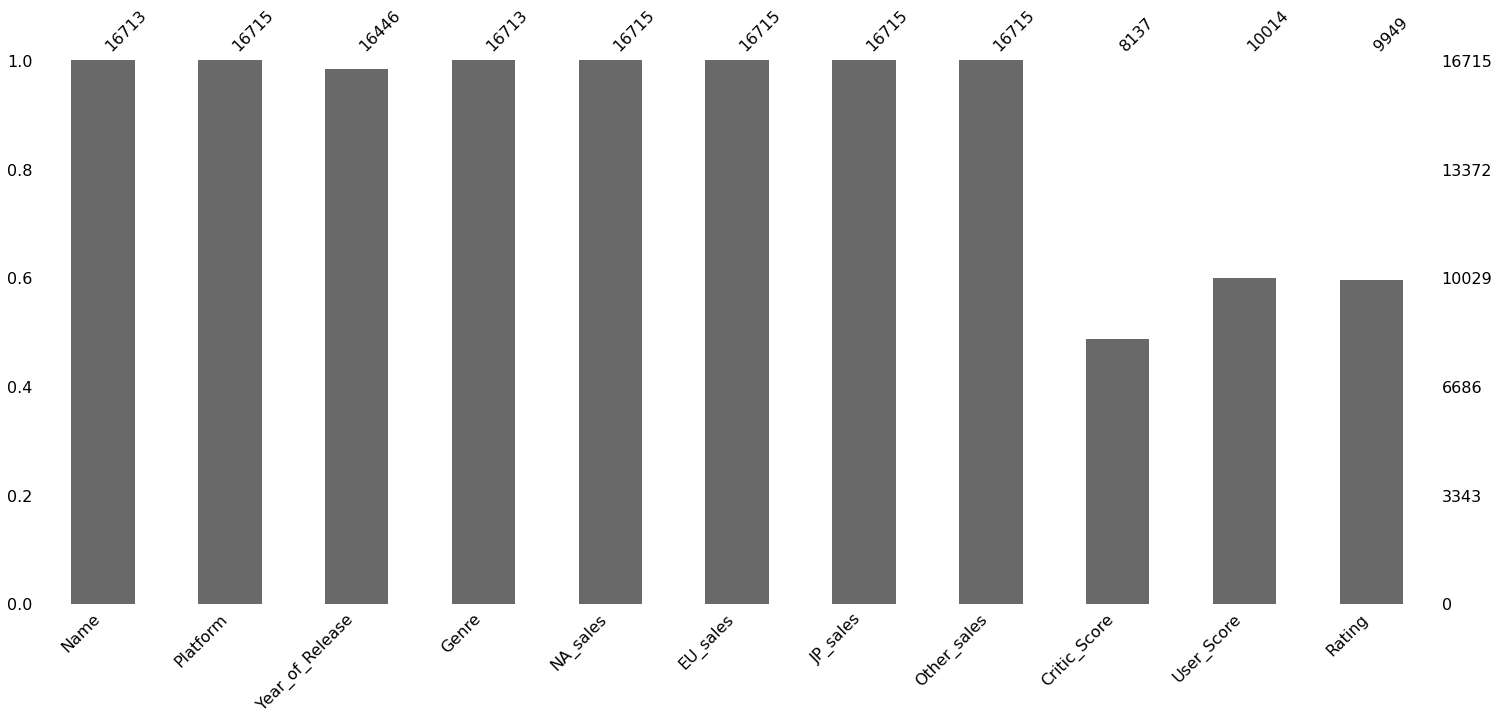

In [6]:
msno.bar(df)
plt.show()

После первого взгляда на данные видно, что:
- заголовки столбцов в таблице необходимо привести к правильному стилю, без заглавных букв;
- необходимо поменять в некоторых столбцах типы данных;
- количество значений в столбцах различается, значит в данных есть пропущенные значения. Увидеть это можно по графику приведенному выше.

## Подготовка данных

### Замена названия столбцов.

Для удобства в работе необходимо привести заголовки столбцов к правильному стилю. Для этого необходимо привести все буквы к нижнему регистру.

In [7]:
df.columns # перечень названий столбцов таблицы df

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [8]:
df.columns = df.columns.str.lower() # метод df.columns.str.lower() для переименования стобцов

In [9]:
df.columns # проверка результатов - перечень названий столбцов

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Преобразование данных в нужные типы.

После замены названия столбцов необходимо проверить типы данных в данных столбцах. Возможно какие-то столбцы имеют неправильный тип данных.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [11]:
df['year_of_release'].head()

0    2006.0
1    1985.0
2    2008.0
3    2009.0
4    1996.0
Name: year_of_release, dtype: float64

В столбце с годом выпуска явно должено быть целое число. Изменим вещественный тип данных в столбце `year_of_release` на целочисленный тип.

Для начала обработаем пропуски в этом столбце. Их не так много, можно их удалить, либо, чтобы не искажать данные, заменим на маркер `-1`.

Год выпуска игры может быть пропущен из-за того, что не указан при поиске в источнике, либо при обработке могла возникнуть человеческая ошибка, либо же год выпуска игры может быть неизвестен.

In [12]:
df['year_of_release'] = df['year_of_release'].fillna(-1).astype('int')

In [13]:
df['year_of_release'].isna().sum()

0

Следующим шагом изменим тип данных в столбце `critic_score`. В таблице указаны данные вещественного типа, но посмотрев на данные, можно с уверенностью сказать, что они целочисленные.

Для замены типа данных потребуется обработать пропуски, заменим их на значение равное маркеру `-1`, т.к. пропусков больше половины, их нельзя удалить, потому что исказятся данные. 

Пропуски могли появиться в этом столбце из-за того, что далеко не все игры оценивают критики, либо же не все оцени находятся в открытом доступе. Далее применим метод `astype()`.

In [14]:
df['critic_score'] = df['critic_score'].fillna(-1).astype('int')

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

В том числе метод `fillna` и `astype` можно применять к нескольким столбцам одновременно.
    
Если столбцов более 2–ух, то рекомендую применять цикл `for`.
    
Пример: 
    
`df.astype({ "col1": "float64", "col2": "int64"})`
    
</div>

В столбце `user_score` указаны данные строкового типа, но посмотрев на данные, можно с уверенностью сказать, что они должны иметь вещественный тип. Проверим какие значения находятся в данном столбце.

In [15]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Видим, что в столбце `user_score` есть пропуски, а также значения `"tbd"`. Пока что оставим данные в изначальном виде и перейдем к обработке пропусков.

### Обработка пропусков.

Проверим, в каких столбцах еще остались пропуски.

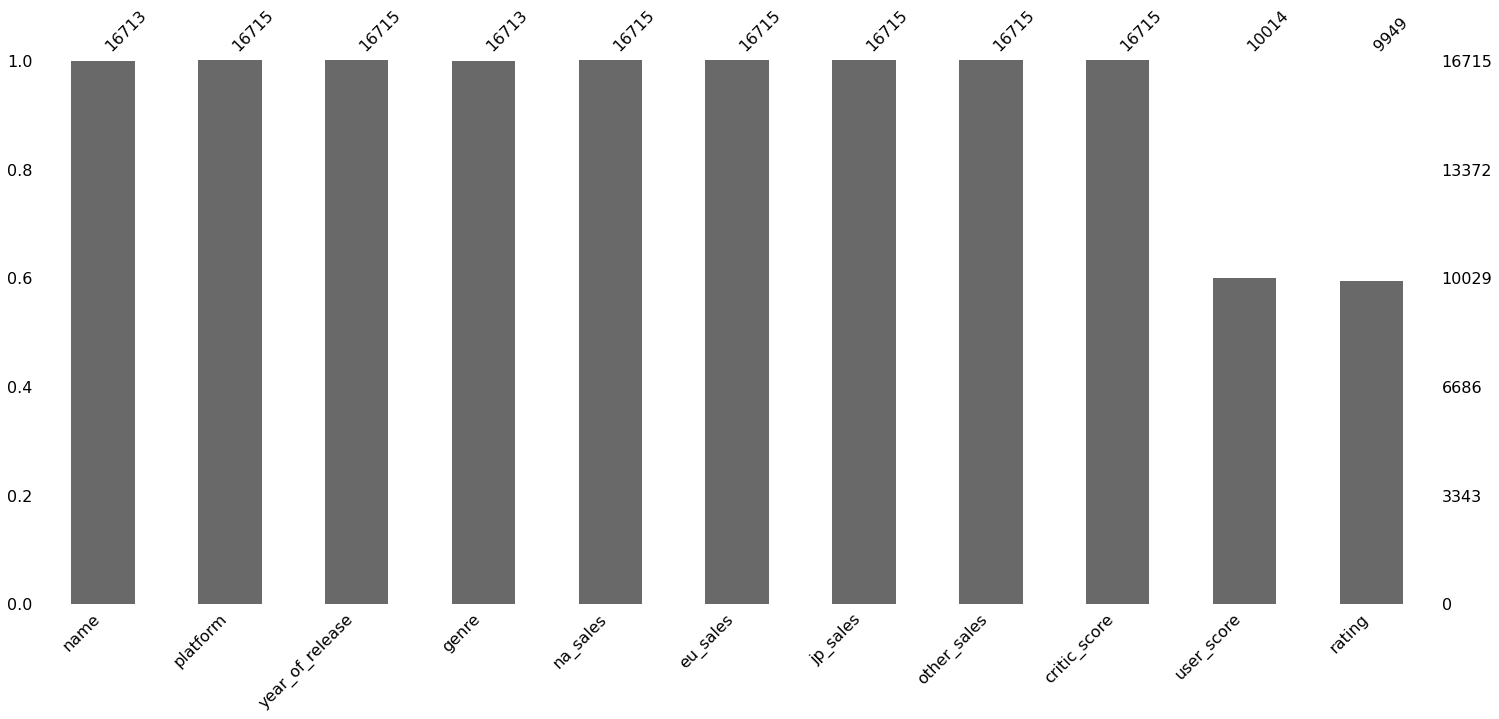

In [16]:
msno.bar(df)
plt.show()

In [17]:
df.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         6701
rating             6766
dtype: int64

Видно, что в столбцах `name` и `genre` есть  пропущенных значения. Данные никак не исказятся, если удалить строки с данными пропусками, т.к. они не несут никакой информации для нас.

In [18]:
df = df.dropna(subset=['name']).reset_index(drop=True)

Несколько столбцов уже обработаны от пропусков. Необходимо заполнить пропуски в столбце `rating` значениями `unknown`, т.к. в данном столбце находятся категориальные данные.

In [19]:
df['rating'] = df['rating'].fillna('unknown')

In [20]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         6699
rating                0
dtype: int64

Осталось большое количество пропусков в столбце `user_score`. В данном случае пропуски можно заполнить значением `-1`, создав отдельную категорию для анализа. На разных платформах могут быть разные оценки, я считаю, что нецелесообразно заменять пропуски средним или медианным значением. Данные действия не следует проводить, даже если одна игра находится с оценками пользователей на каких-либо платформах, а на других платформах оценки не указаны.

In [21]:
df['user_score'] = df['user_score'].fillna('-1')

In [22]:
df['user_score'].value_counts()

-1     6699
tbd    2424
7.8     324
8       290
8.2     282
       ... 
9.6       2
1.5       2
0.9       2
9.7       1
0         1
Name: user_score, Length: 97, dtype: int64

Вспомним, что в данном столбце есть значения `"tbd"`, которые означают 'To Be Determined', то есть "Будет определено". Для того, чтобы проводить с данным столбцом вычислительные операции, необходимо привести его к вещественному типу данных. В данном случае значения `"tbd"` можно заменить на маркер `-2` ,и привести столбец к вещественному типу, а для того чтобы работать с вычислительными операциями в будущем, необходимо будет исключать значения `-1` и `-2`.

In [23]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = '-2'

In [24]:
df['user_score'].unique()

array(['8', '-1', '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '-2', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Теперь можно поменять тип данных в столбце `user_score`. Меняем тип `object` на `float64`.

In [25]:
df['user_score'] = pd.to_numeric(df['user_score'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


Таким образом, были заполнены пропуски в данных.

### Суммарные продажи во всех регионах.

Создадим новый столбец с суммарными продажами во всех регионах.

In [27]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

Проверим, появился ли новый столбец.

In [28]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,unknown,31.38


## Исследовательский анализ данных

### Количество игр выпускавшиеся по годам.

Посмотрим, сколько игр выпускалось в разные годы и важны ли данные за все периоды.

In [29]:
df_games_on_year = df.pivot_table(index = df.index, values = 'year_of_release', aggfunc = 'sum')

In [30]:
df_games_on_year = df_games_on_year.query('year_of_release > 0').copy()

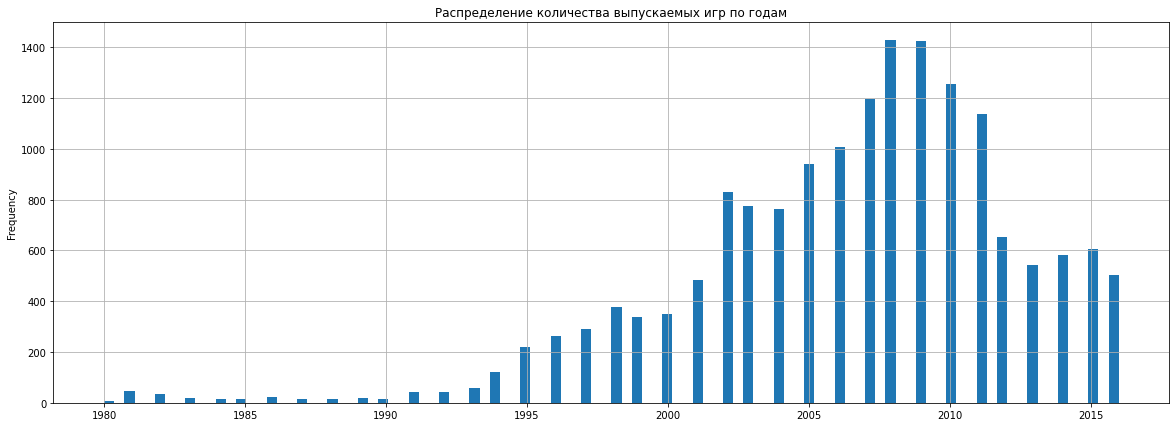

In [31]:
df_games_on_year['year_of_release'].plot(kind ='hist', bins=100, grid=True, figsize= (20,7),
                              title='Распределение количества выпускаемых игр по годам')
plt.show()

In [32]:
df_games_on_year.value_counts()

year_of_release
2008               1427
2009               1426
2010               1255
2007               1197
2011               1136
2006               1006
2005                939
2002                829
2003                775
2004                762
2012                653
2015                606
2014                581
2013                544
2016                502
2001                482
1998                379
2000                350
1999                338
1997                289
1996                263
1995                219
1994                121
1993                 60
1981                 46
1992                 43
1991                 41
1982                 36
1986                 21
1989                 17
1983                 17
1990                 16
1987                 16
1988                 15
1985                 14
1984                 14
1980                  9
dtype: int64

Из графика представленного выше и приведенных данных, можно сделать несколько выводов:
- в период с 1980 по 1994 игр выпускалось незначительное количество;
- далее пошел рост до 2008 года;
- пик количетсва выпущенных игр приходится на 2008 г.;
- после 2008 г. началось снижение количества игр.

Думаю, что данные за период с 1980 по 1994 не важны, т.к. они занимают очень маленький процент данных.

### Продажи по платформам.

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

In [33]:
top_platforms = df.pivot_table(index='platform', values='total_sales',
                               aggfunc='sum').sort_values(by='total_sales',ascending=False)

In [34]:
top_platforms = top_platforms.head(10)

С помощью данных действий были найдены 10 лучших платформ по общим продажам. Посмотрим, как распределяются продажи по годам.

In [35]:
top_10_df = df[df['platform'].isin(top_platforms.index)].reset_index(drop=True)

Создадим функцию для построения столбчатой диаграммы.

In [36]:
def plot_bar(data, name): # функция для построения столбчатой диаграммы
    data.plot.bar(stacked=True, figsize=(20,10), grid=True, title=name)
    return plt.show()

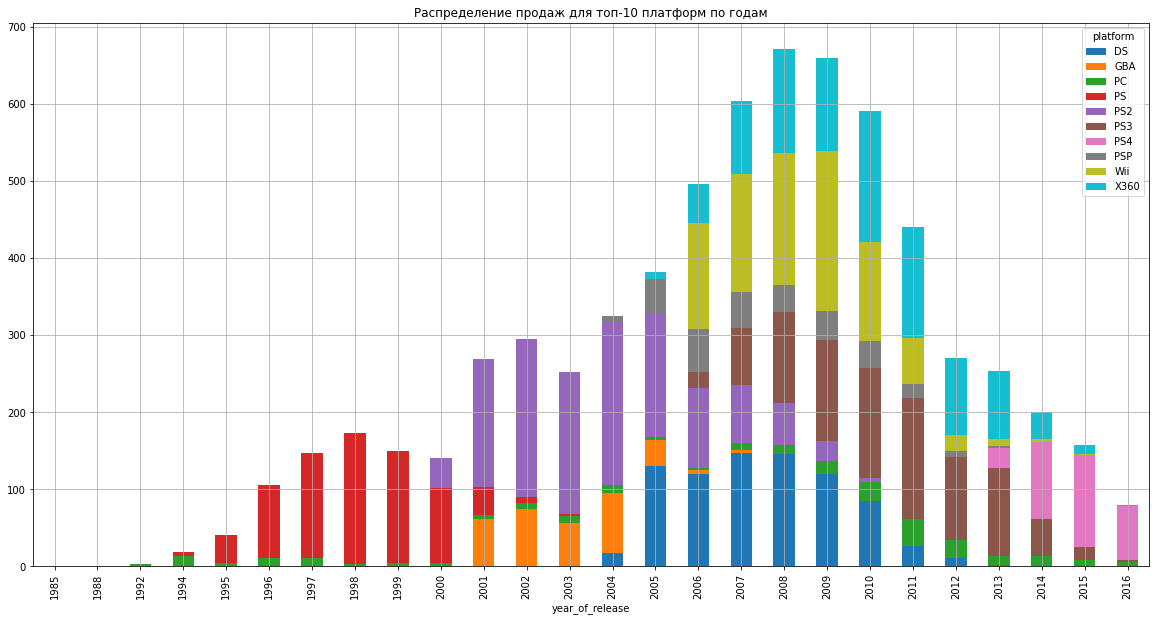

In [37]:
# используем данные с известными годами изданий
sales_with_year_top_10 = top_10_df.query('year_of_release > 0').copy()
# строим сводную таблицу по продажам
platform_sales_by_year_top_10 = sales_with_year_top_10\
.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc="sum")
# рисуем столбчатую диаграмму
plot_bar(platform_sales_by_year_top_10, 'Распределение продаж для топ-10 платформ по годам')

По графику видно, что:
- пик продаж был в 2008 году;
- большее количество платформ выпускали игры в 2006-2010 годах;
- `PC` имеет продажи на протяжении всего периода.
- заметен тренд снижения продаж для платформ и их уменьшение в количестве.

Посмотрим средний срок жизни платформы в данных о лучших 10 платформах.

In [38]:
sales_with_year_top_10_avg_min = sales_with_year_top_10[sales_with_year_top_10['platform'] !='PC'].groupby('platform')['year_of_release'].min()
sales_with_year_top_10_avg_max = sales_with_year_top_10[sales_with_year_top_10['platform'] !='PC'].groupby('platform')['year_of_release'].max()

In [39]:
(sales_with_year_top_10_avg_max - sales_with_year_top_10_avg_min).mean()

11.11111111111111

В среднем платформа имеет продажи в течении 11 лет, если не брать счёт платформу `PC`.

###  Данные за соответствующий актуальный период.

Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Из графика выше видно, что с 2009 года начался нисходящий тренд, но актуальный период возьмем начиная с 2013 года, т.к. эти данные ближе к 2017г. Построим график продаж после 2013 года.

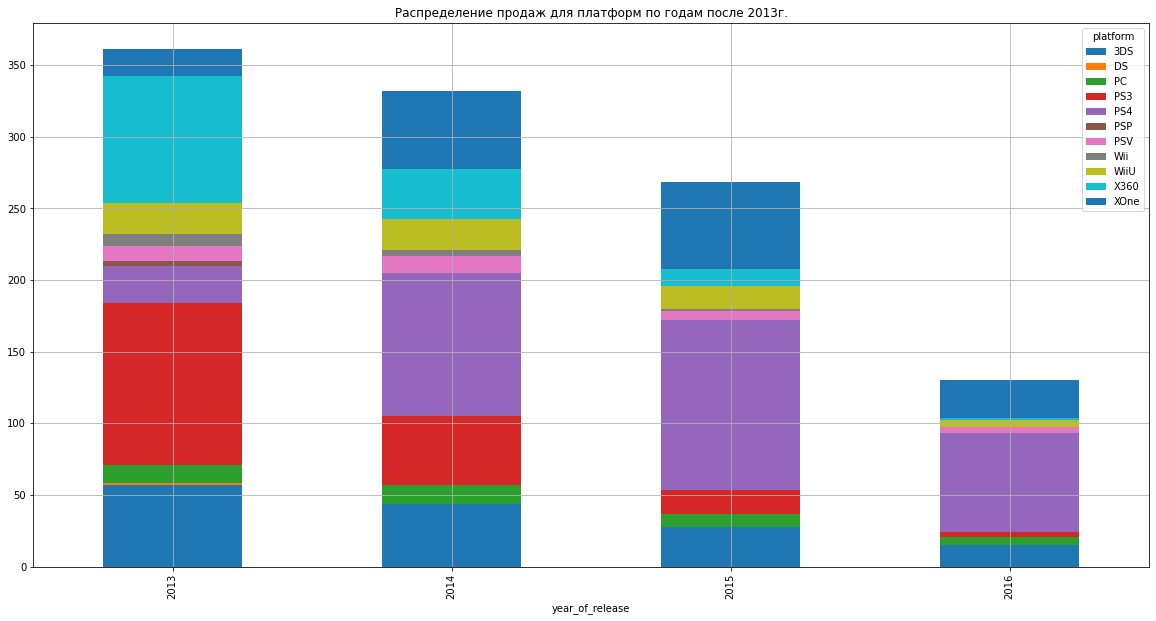

In [40]:
# используем данные с известными годами изданий
df_actual = df.query('year_of_release >= 2013').copy().reset_index(drop=True)
# строим сводную таблицу по продажам
platform_sales_by_year_2013 = df_actual.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
# рисуем столбчатую диаграмму
plot_bar(platform_sales_by_year_2013, 'Распределение продаж для платформ по годам после 2013г.')

### Платформы лидирующие по продажам.

Определим, какие платформы лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ.

In [41]:
top_platforms_actual = df_actual.groupby('platform')['total_sales']\
.agg(['sum', 'count']).sort_values(by='sum', ascending=False)

top_platforms_actual.columns = ['sum_of_total_sales', 'count_of_total_sales']
top_platforms_actual.head()

,sum_of_total_sales,count_of_total_sales
platform,,
PS4,314.14,392
PS3,181.43,345
XOne,159.32,247
3DS,143.25,303
X360,136.80,186


Таким образом мы определили, какие платформы заработали больше всего за актуальный период. Видим, что в топ-5 входят такие платформы, как `PS4`, `PS3`, `XOne`, `3DS` и `X360`.

Посмотрим на распределение количества продаж платформ по года, начиная с 2013 г.

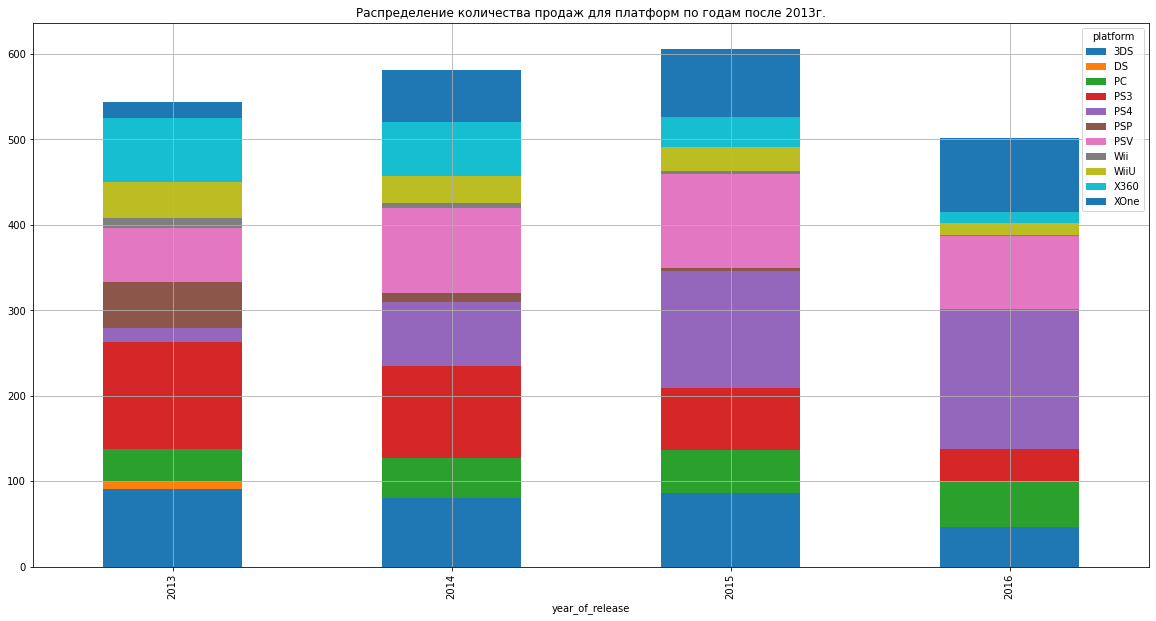

In [42]:
platfom_sales_count = df_actual.pivot_table(index='year_of_release',
                                            columns='platform', values='total_sales', aggfunc='count')

plot_bar(platfom_sales_count, 'Распределение количества продаж для платформ по годам после 2013г.')

In [43]:
year = df_actual.groupby(['platform', 'year_of_release']).agg({'total_sales': 'count'})

In [44]:
year

total_sales
platform year_of_release             
3DS      2013                      91
         2014                      80
         2015                      86
         2016                      46
DS       2013                       8
PC       2013                      38
         2014                      47
         2015                      50
         2016                      54
PS3      2013                     126
         2014                     108
         2015                      73
         2016                      38
PS4      2013                      16
         2014                      75
         2015                     137
         2016                     164
PSP      2013                      54
         2014                      10
         2015                       3
PSV      2013                      63
         2014                     100
         2015                     110
         2016                      85
Wii      2013                      12
         2014                       6
         2015                       4
         2016                       1
WiiU     2013                      42
         2014                      31
         2015                      28
         2016                      14
X360     2013                      75
         2014                      63
         2015                      35
         2016                      13
XOne     2013                      19
         2014                      61
         2015                      80
         2016                      87

По графику и расчитанным данным видно, что
- платформы `XOne` и `PS4` неплохо нарастили количество продаж, соответсвенно и сумма продаж растет;
- некоторые платформы остались без продаж к 2016 году;
- стоит отметить платформы `3DS` и `PSV`, у которых количество продаж держится на стабильном уровне, но по сумме продаж они уступают топовым платформам;
- за актуальный период `PS3`, `X360` ушли с первых строк продаж. Неудивительно, т.к. их младшие братья вытесняют платформы с рынка продаж.

### Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам.

Построим график "ящик с усами" для актуального периода для всех платформ.

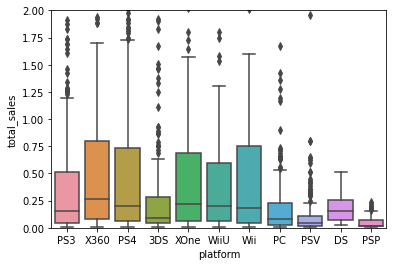

In [45]:
sns.boxplot(data = df_actual, x='platform', y ='total_sales')
plt.ylim(0,2)
plt.show()

Обратим внимание на топ-5 платформ, более детально

In [46]:
top_5_plat = df_actual[df_actual['platform'].isin(top_platforms_actual.head().index)]

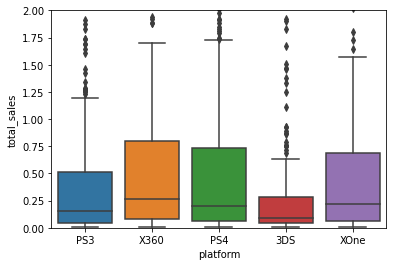

In [47]:
sns.boxplot(data = top_5_plat, x='platform', y ='total_sales')
plt.ylim(0,2)
plt.show()

Построим диаграмму размаха без выбросов.

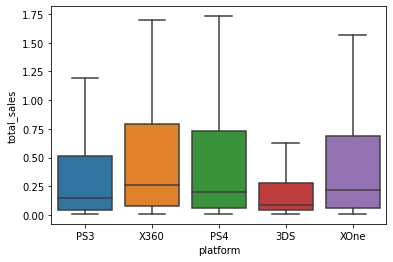

In [48]:
sns.boxplot(data = top_5_plat, x='platform', y ='total_sales',showfliers=False)
plt.show()

По графику можно сделат вывод, что:
- медианные значения указанных платформ находятся не выше отметки в 0.25;
- в размах усов попадают нормальные значения, все что находится за ними, можно считать выбросами, крайняя граница находится в районе 1.75;
- Значения межквартальных размахов находятся не выше ометки в 0.75.

### Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков. Построение диаграмм рассеяния и подсчет корреляций между отзывами и продажами.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

Уберем значения в оценках критиков и пользователей, которые нам неизвестны и проведем исследовательский анализ.

In [49]:
#df_actual_new = df_actual.query('(critic_score > 0) & (user_score > 0)').copy().reset_index(drop=True)

In [50]:
df_actual_new = df_actual.loc[(df_actual['critic_score'] > 0)&(df_actual['user_score'] > 0)]\
.reset_index(drop=True)

Самые большие продажи, как по количеству, так и по сумме, показывает платформа `PS4`. Построим для данной платформы диаграмму по всем числовым признакам и посмотрим на неё.

In [51]:
df_ps_4 = df_actual_new.loc[df_actual_new['platform'].isin(['PS4'])]

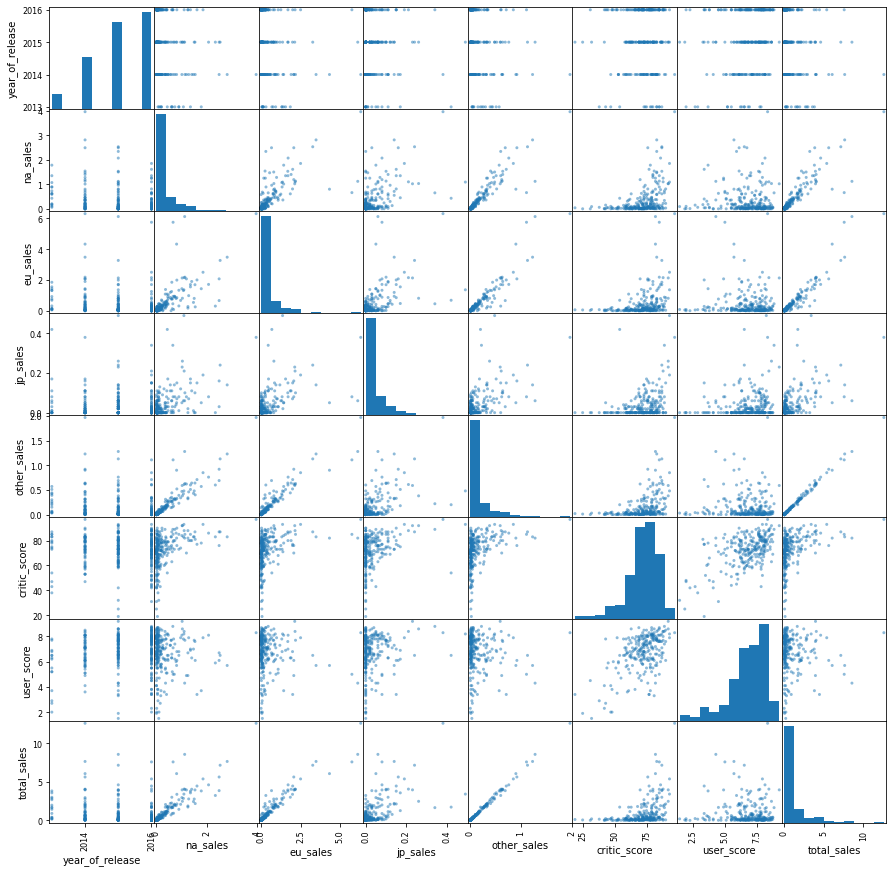

In [52]:
pd.plotting.scatter_matrix(df_ps_4, figsize=(15, 15));

На графике видно, что продажи увеличиваются в том месте где стоят более высокие оценки критиков. С графиком пользователей не все так очевидно. Рассмотрим более подробно каждый график. Также рассчитаем корреляцию между оценками и продажами.

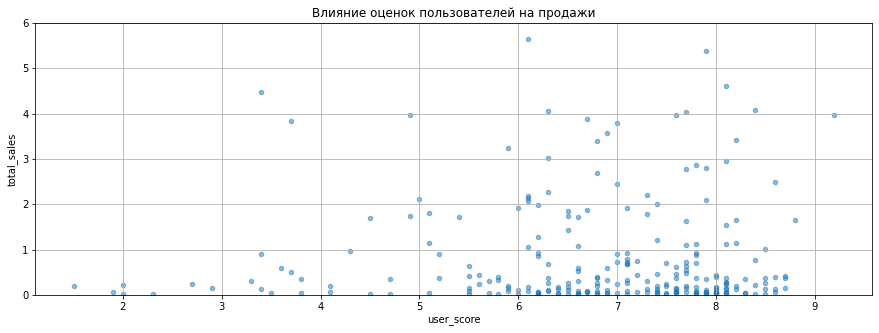

In [53]:
df_ps_4.plot(x='user_score', y='total_sales', kind='scatter', grid=True, figsize=(15, 5), alpha = 0.5,
                         title='Влияние оценок пользователей на продажи')
plt.ylim(0,6)
plt.show()


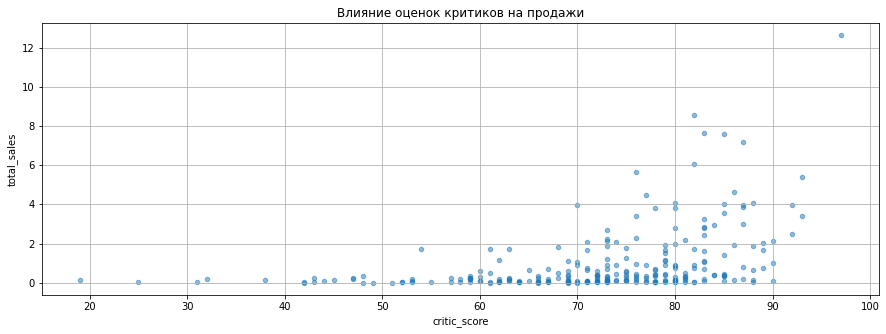

In [54]:
df_ps_4.plot(x='critic_score', y='total_sales', kind='scatter', grid=True, figsize=(15, 5), alpha=0.5,
                         title='Влияние оценок критиков на продажи')
plt.show()

In [55]:
df_ps_4['user_score'].corr(df_ps_4['total_sales'])

-0.03362497596528878

In [56]:
df_ps_4['critic_score'].corr(df_ps_4['total_sales'])

0.40589480145836687

Построим матрицу корреляции и визуализируем ее с помощью `heatmap`.

In [57]:
correlations_ps_4 = df_ps_4[['user_score', 'critic_score','total_sales']].corr()

In [58]:
correlations_ps_4

,user_score,critic_score,total_sales
user_score,1.000000,0.557654,-0.033625
critic_score,0.557654,1.000000,0.405895
total_sales,-0.033625,0.405895,1.000000


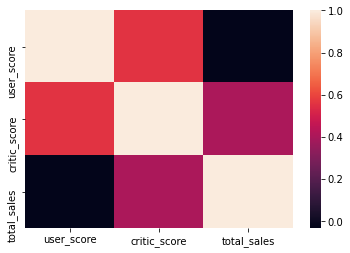

In [59]:
sns.heatmap(correlations_ps_4);

Исходя из расчетов корреляции можно сказать, что:
- оценки пользователей практически никак не влияют на продажи на платформе;
- оценки критиков намного сильнее коррелируют с продажами на платформе;

Неудивительно, ведь когда мы выбираем какой-либо продукт, мы в первую очередь смотрим на отзывы проффесионалов.

### Продажи игр на других платформах.

Возьмем топ-5 платформ по продажам и проанализируем их.

In [60]:
platforms = top_platforms_actual.head().index
n_platforms = len(platforms)
# список столбцов, по которым хотим построить корреляцию
cols = ['user_score', 'critic_score', 'total_sales']
# отрисовываем для каждой платформы
for platform in platforms:
    # отбираем все строки для платформы 
    # и дропаем неинформативные записи среди отобранных
    q = df_actual['platform'] == platform
    platform_df = df_actual[q].dropna(subset=cols)   
    # строим корреляции по выбранным столбцам
    correlations = platform_df[cols].corr()
    
correlations

,user_score,critic_score,total_sales
user_score,1.000000,0.537847,0.075605
critic_score,0.537847,1.000000,0.245636
total_sales,0.075605,0.245636,1.000000


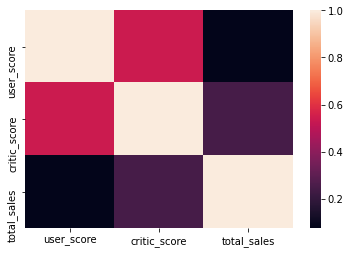

In [61]:
sns.heatmap(correlations);

Можно сделать вывод, что:
- общие продажи слабо коррелируют с отзывами критиков и обычных пользователей;
- отзывы критиков вполне неплохо коррелируют с отзывами пользователей;

Низкие уровни кореляции могут быть обусловлены тем, что кореляции отображает силу линейной взаимосвязи, а у этих данных может быть другая зависимость

### Распределение игр по жанрам.

Посмотрим на общее распределение игр по жанрам.

In [62]:
df_actual_new['genre'].value_counts()

Action          309
Shooter         132
Role-Playing    127
Sports          110
Racing           59
Platform         50
Adventure        46
Misc             42
Fighting         42
Strategy         26
Simulation       26
Puzzle            7
Name: genre, dtype: int64

In [63]:
df_genre = df_actual_new.sort_values(by='genre', ascending=False)

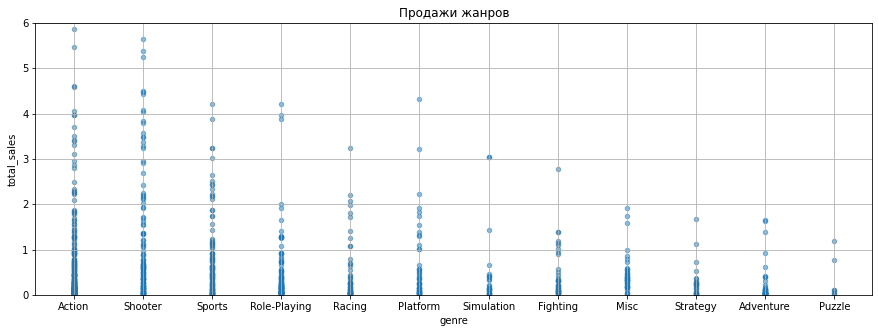

In [64]:
df_genre.sort_values(by='total_sales',ascending=False).plot(x='genre', y='total_sales', kind='scatter', alpha=0.5,
                                                            grid=True, figsize=(15, 5),title='Продажи жанров')
plt.ylim(0,6)
plt.show()

Посмотрим на медианную цену продаж по каждому жанру.

In [65]:
genre_sales = df_genre[['genre', 'total_sales']].reset_index(drop=True)

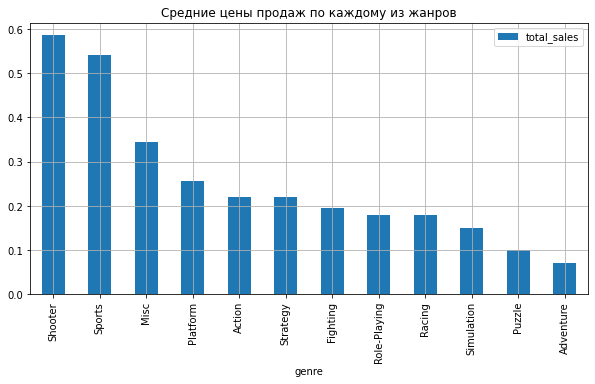

In [66]:
genre_sales.groupby('genre').median().sort_values(by='total_sales', ascending=False)\
.plot.bar(figsize=(10,5), grid=True, title='Средние цены продаж по каждому из жанров');

In [67]:
df_genre_sales = df_genre.groupby('genre')['total_sales'].agg(['count','sum', 'mean'])
df_genre_sales.columns = ['count_of_genre_games', 'sum_of_genre_sales', 'mean_of_genre_sales']
df_genre_sales.sort_values(by='sum_of_genre_sales', ascending=False)

,count_of_genre_games,sum_of_genre_sales,mean_of_genre_sales
genre,,,
Action,309,231.62,0.749579
Shooter,132,170.99,1.295379
Sports,110,115.06,1.046000
Role-Playing,127,61.21,0.481969
Racing,59,34.09,0.577797
Platform,50,31.98,0.639600
Misc,42,19.39,0.461667
Fighting,42,17.79,0.423571
Simulation,26,12.07,0.464231


Из анализа данных видно, что:
- самые прибыльные жанры это `Action`, `Shooter`, `Sports`;
- количество игр в данных жанрах больше, чем в остальных;
- можно заметить, что жанр `Role-Playing` имеет больше игр чем `Sports`, но видно, что сумма продаж данного жанра в 2 раза меньше;
- самые низкие продажи у таких жанров, как `Puzzle`, `Strategy` и `Adventure`.
- самые дорогие жанры `Shooter`, `Sports`, `Misc`.

## Составление портрета пользователя каждого региона.

### Самые популярные платформы для каждого региона

**Рассмотрим топ-5 платформ по продажам в Северной Америке.**

In [68]:
top_5_platforms_na = df_actual_new.pivot_table(index = 'platform', values='na_sales', aggfunc='sum')\
.sort_values(by='na_sales', ascending=False)

In [69]:
top_5_platforms_na.head()

,na_sales
platform,
PS4,84.46
XOne,76.03
X360,50.85
PS3,42.13
WiiU,23.04


Создадим функцию для построения графиков долей.

In [70]:
def plot_pie(data, name, pct): #функция для построения круговой диаграммы
    data.plot.pie(subplots=True, figsize=(15,8), autopct=pct, legend=False);
    plt.title(name)
    return plt.show()

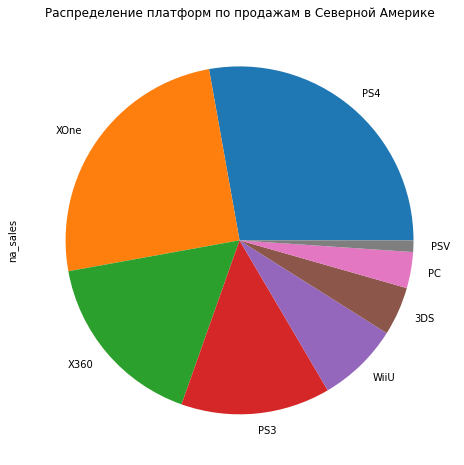

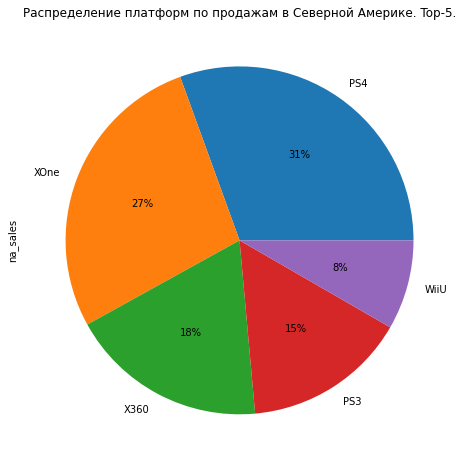

In [71]:
plot_pie(top_5_platforms_na, 'Распределение платформ по продажам в Северной Америке', None)
plot_pie(top_5_platforms_na.head(), 'Распределение платформ по продажам в Северной Америке. Top-5.', '%1.0f%%')

По графикам сразу заметно, что:
- выделяются сразу 4 платформы, которые занимают больше 75 процентов всех продаж;
- в топ 5 вошли такие  платформы, как `PS4`, `XOne`, `X360`, `PS3`, `WiiU`;
- стоит отметить, что `PS4` и `XOne` занимают больше половины продаж.

Также видно, что если сравнивать доли именно топ-5 платформ, то больше 75 процентов продаж приходится на `PS4`, `XOne`, `X360`.

**Рассмотрим топ-5 игр по продажам в Европе.**

In [72]:
top_5_platforms_eu = df_actual_new.pivot_table(index = 'platform', values='eu_sales', aggfunc='sum')\
.sort_values(by='eu_sales', ascending=False)

In [73]:
top_5_platforms_eu.head()

,eu_sales
platform,
PS4,112.44
PS3,43.29
XOne,42.23
X360,26.54
PC,21.93


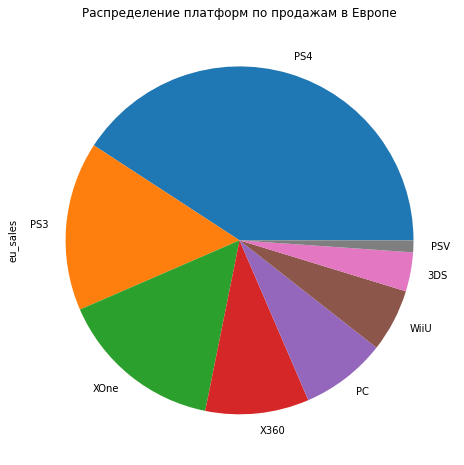

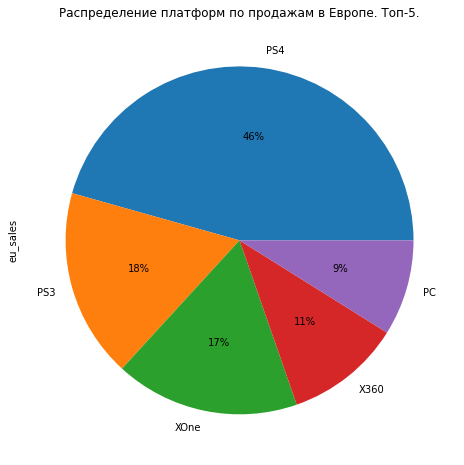

In [74]:
plot_pie(top_5_platforms_eu, 'Распределение платформ по продажам в Европе', None)
plot_pie(top_5_platforms_eu.head(), 'Распределение платформ по продажам в Европе. Топ-5.', '%1.0f%%')

В Европе распределение продаж по платформам отличается от Северной Америки. Здесь мы видим
- значительный перевес в сторону семейства `PS`;
- в топ-5 платформ входят `PS4`, `PS3`, `XOne`, `X360` и `PC`;
- `PS4` доминирует на рынке в европе и `XOne` стоит потрудится, чтобы их догнать;
- `PS3` остается также более актуальна, чем `XOne` в Европе, что удивительно;
- на 5 строчке расположилась платформа `PC`, которая имеет практически одинаковую долю с платформой `X360`.

Стоит отметить, что если сравнивать доли лучших 5 платформ по продажам, то более 75 процентов продаж приходится на `PS4`, `PS3`, `XOne`.

**Рассмотрим топ-5 игр по продажам в Японии.**

In [75]:
top_5_platforms_jp = df_actual_new.pivot_table(index = 'platform', values='jp_sales',
                                               aggfunc='sum').sort_values(by='jp_sales', ascending=False)

In [76]:
top_5_platforms_jp.head()

,jp_sales
platform,
3DS,14.16
PS3,10.99
PS4,9.43
WiiU,8.36
PSV,5.71


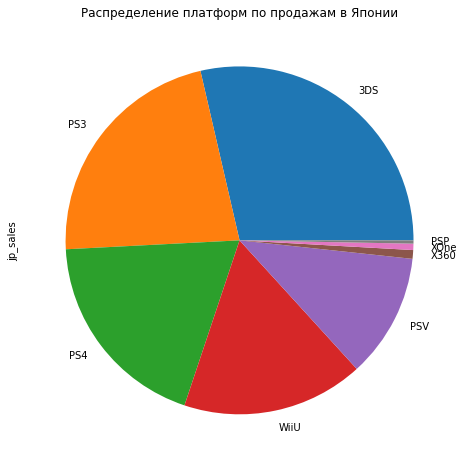

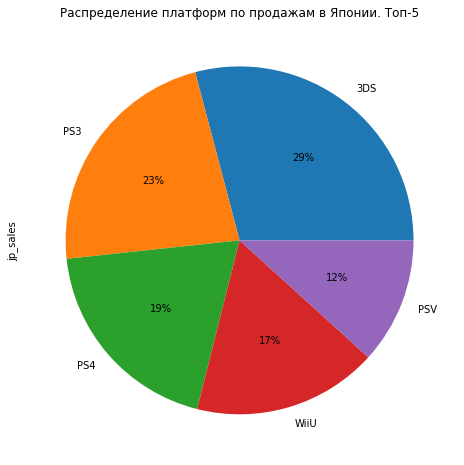

In [77]:
plot_pie(top_5_platforms_jp, 'Распределение платформ по продажам в Японии', None)
plot_pie(top_5_platforms_jp.head(), 'Распределение платформ по продажам в Японии. Топ-5', '%1.0f%%')

В Японии совсем другая картина:
- pдесь в топ-5 входят такие платформы, как `3DS`, `PS3`, `PS4`, `WiiU` и `PSV`.
- больше всего доля продаж у `3DS`;
- в отличии от Европы и Северной Америки, продажи в Японии по платформе `PS3` выше, чем `PS4`;
- стоит отметить, что топовые платформы, такие как `X360` и `XOne` не вошли в топ-5 платформ в Японии.

Более 95% занимают платформы из топ-5. Более 75 процентов рынка продаж приходятся на `3DS`, `PS3`, `PS4`, `WiiU`. Также около 99 процентов продаж приходятся на топ-5 платформ.

### Самые популярные жанры по регионам.

**Рассмотрим самые популярные жанры. Начнем с Северной Америки.**

In [78]:
top_5_genre_na = df_actual_new.pivot_table(index = 'genre', values='na_sales', aggfunc='sum')\
.sort_values(by='na_sales', ascending=False)

In [79]:
top_5_genre_na.head()

,na_sales
genre,
Action,97.06
Shooter,81.03
Sports,51.16
Role-Playing,23.08
Platform,13.75


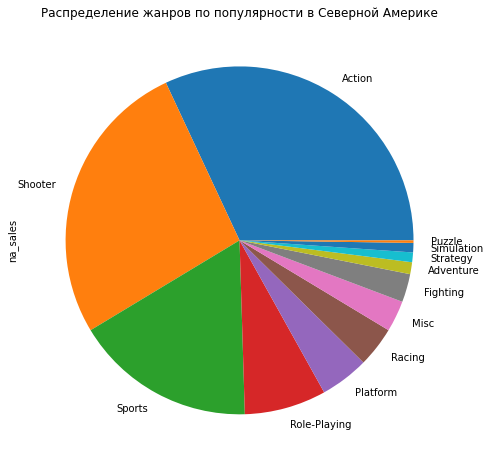

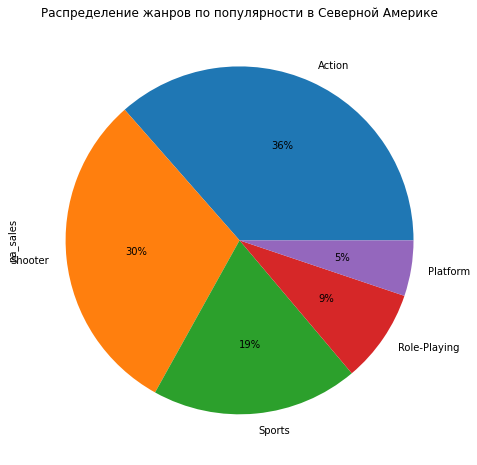

In [80]:
plot_pie(top_5_genre_na, 'Распределение жанров по популярности в Северной Америке', None)
plot_pie(top_5_genre_na.head(), 'Распределение жанров по популярности в Северной Америке', '%1.0f%%')

После анализа можно сделать некоторые выводы:
- самые популярные жанры в Северной Америке - `Action`, `Shooter`, `Sports`, `Role-Plyaing`, и `Platform`;
- около 75 процентов от общей доли жанров занимают `Action`, `Shooter` и `Sports`;
- также 85 процентов продаж занимают данные три жанра в сравнении с топ-5.

Более 85 процентов занимают топ-5 по сравнению с общей долей продаж.

**Рассмотрим самые популярные жанры в Европе.**

In [81]:
top_5_genre_eu = df_actual_new.pivot_table(index = 'genre', values='eu_sales', aggfunc='sum')\
.sort_values(by='eu_sales', ascending=False)

In [82]:
top_5_genre_eu.head()

,eu_sales
genre,
Action,91.00
Shooter,64.04
Sports,46.96
Role-Playing,19.28
Racing,16.90


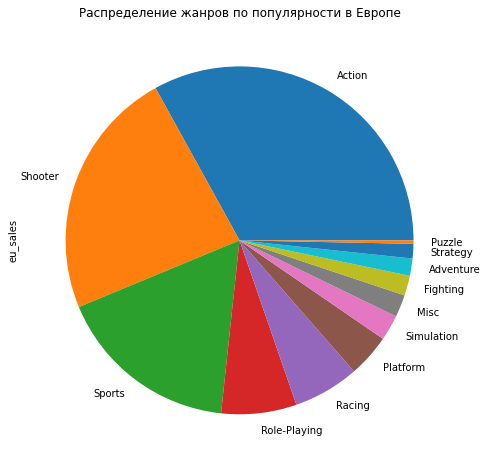

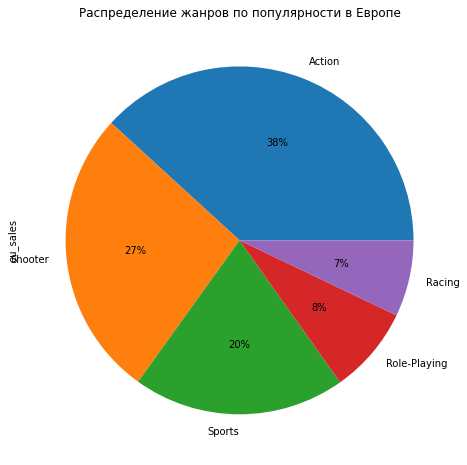

In [83]:
plot_pie(top_5_genre_eu, 'Распределение жанров по популярности в Европе', None)
plot_pie(top_5_genre_eu.head(), 'Распределение жанров по популярности в Европе', '%1.0f%%')

После анализа можно сделать несколько выводов:
- в Европе практически совпадает пятерка лидеров по жанрам с Северной Амеркой;
- осталась та же четверка состоящая из `Action`, `Shooter`, `Sports`, `Role-Plyaing`, а также добавился жанр `Racing`;
- в данном случае также 75 процентов от топ-5 жанров занимают три жанра `Action`, `Shooter` и `Sports`.

Также стоит отметить, что топ-5 жанров занимают более 85 процентов продаж.

**Рассмотрим самые популярные жанры в Японии.**

In [84]:
top_5_genre_jp = df_actual_new.pivot_table(index = 'genre', values='jp_sales', aggfunc='sum')\
.sort_values(by='jp_sales', ascending=False)

In [85]:
top_5_genre_jp.head()

,jp_sales
genre,
Action,14.61
Role-Playing,12.44
Shooter,5.28
Platform,4.16
Misc,3.12


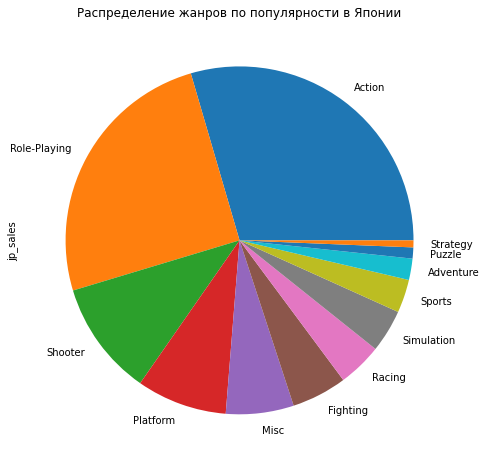

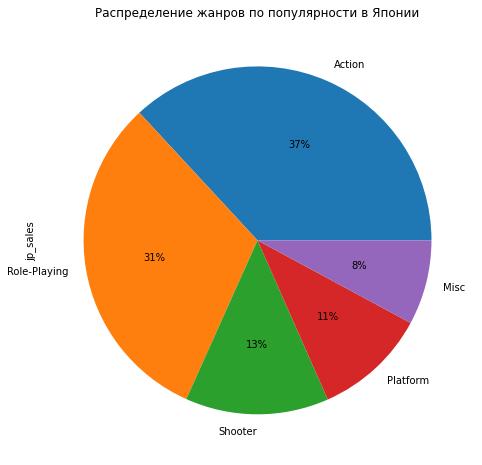

In [86]:
plot_pie(top_5_genre_jp, 'Распределение жанров по популярности в Японии', None)
plot_pie(top_5_genre_jp.head(), 'Распределение жанров по популярности в Японии', '%1.0f%%')

После анализа можно сделать несколько выводов:
- в Японии в топ-5 жанров входит `Action`, `Role_playing`, `Shooter`, `Platform`, `Misc`;
- первые три жанра заимают больше 75 процентов продаж от доли топ-5 жанров;

Стоит отметить, что около 80 процентов продаж приходятся на топ-5 жанров.

Можно было заметить, что:
- во всех трёх регионах жанр `Action` самый популярный;
- жанры `Shooter` и `Role-Playing` также находятся в топ-5 во всех регионах;
- остальные жанры различны.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Необходимо посмотреть влияет ли рейтинг ESRB на продажи в каэдом регионе.

**Рассмотрим влияние в Северной Америке.**

In [87]:
df_actual_new_rating = df_actual_new.loc[df_actual_new['rating'] != 'unknown']

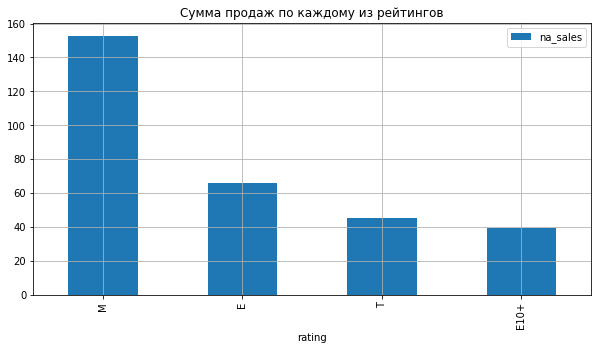

In [88]:
df_actual_new_rating[['na_sales', 'rating']].groupby('rating').sum().sort_values(by='na_sales', ascending=False)\
.plot.bar(figsize=(10,5), grid=True, title='Cумма продаж по каждому из рейтингов');

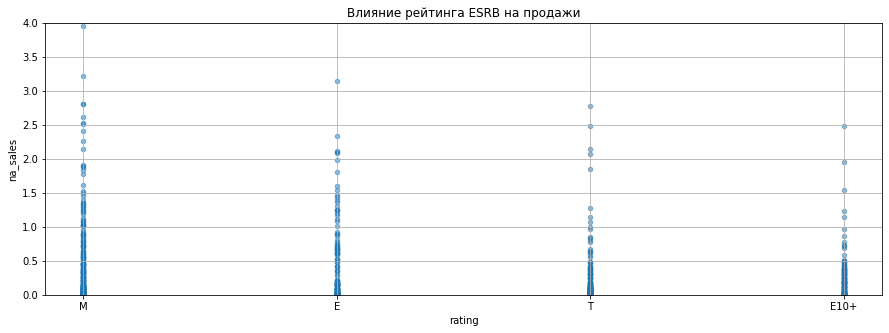

In [89]:
df_actual_new_rating.sort_values(by='na_sales',ascending=False).plot(x='rating', y='na_sales', kind='scatter', alpha=0.5,
                                                            grid=True, figsize=(15, 5),title='Влияние рейтинга ESRB на продажи')
plt.ylim(0,4)
plt.show()

В Северной Америке влияние рейтинга ESBR есть, видим, что:
- продажи с рейтингом `M` выше, чем остальные, как и количество, так и сумма продаж. 
- Самые низкие продажи с рейтингом `E10+`.

**Рассмотрим влияние рейтинга ESBR в Европе.**

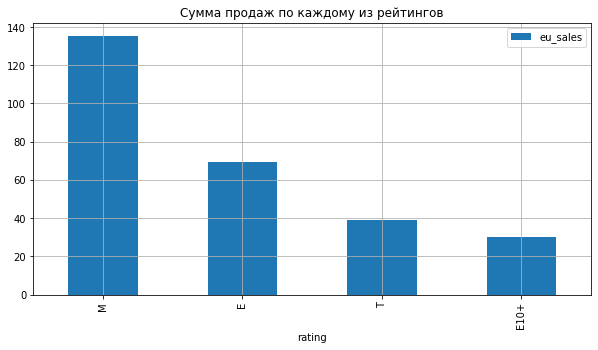

In [90]:
df_actual_new_rating[['eu_sales', 'rating']].groupby('rating').sum().sort_values(by='eu_sales', ascending=False)\
.plot.bar(figsize=(10,5), grid=True, title='Cумма продаж по каждому из рейтингов');

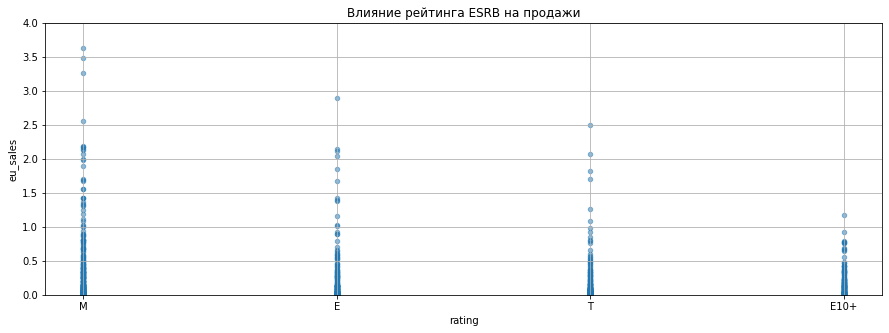

In [91]:
df_actual_new_rating.sort_values(by='eu_sales',ascending=False).plot(x='rating', y='eu_sales', kind='scatter', alpha=0.5,
                                                            grid=True, figsize=(15, 5),title='Влияние рейтинга ESRB на продажи')
plt.ylim(0,4)
plt.show()

В Европе сложилась такая же картина, как и в Северной Америке:
- Самый продаваемый рейтинг `M`;
- Самые низкие продажи с рейтигом `E10+1`.

**Рассмотрим влияние рейтинга ESBR в Японии.**

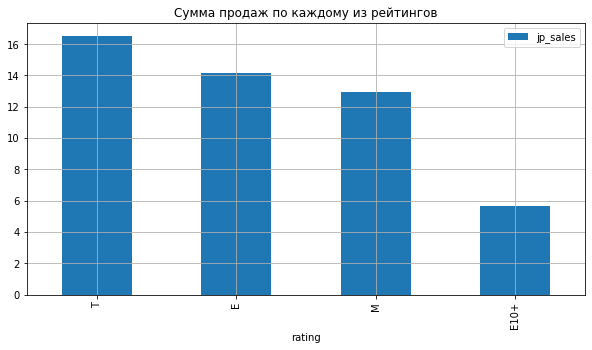

In [92]:
df_actual_new_rating[['jp_sales', 'rating']].groupby('rating').sum().sort_values(by='jp_sales', ascending=False)\
.plot.bar(figsize=(10,5), grid=True, title='Cумма продаж по каждому из рейтингов');

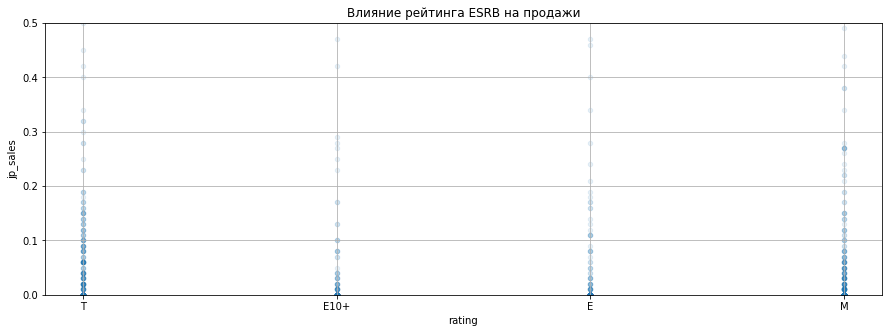

In [93]:
df_actual_new_rating.sort_values(by='jp_sales',ascending=False)\
.plot(x='rating', y='jp_sales', kind='scatter', alpha=0.1,
      grid=True, figsize=(15, 5),title='Влияние рейтинга ESRB на продажи')
plt.ylim(0,0.5)
plt.show()

В Японии рейтинги распределились по другому:
- на первом месте по сумме продаж находится рейтинг `T`;
- на последнем месте рейтинг `E10+`.

Можно сделать вывод, что в Америке и Европе одна и та же зависимость продаж от рейтинга, а в Японии на лидирующие строчки выходят другие рейтинги. Стоит отметить, что рейтинг `E10+` имеет самые низкие продажи в каждом регионе.

## Проверка гипотез.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

```
H(0): средние пользовательские рейтинги ('user_score') XBox One = средним пользовательским рейтингам ('user_score') PC.
H(1): средние пользовательские рейтинги ('user_score') XBox One ≠ средним пользовательским рейтингам ('user_score') PC. 
alpha = 0.05.
```

In [94]:
df_actual_new.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
2,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
3,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73,2.6,M,10.24
4,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71,2.6,M,9.36


In [95]:
xone = df_actual_new[df_actual_new['platform'] == 'XOne']
user_score_xone = xone['user_score']

In [96]:
pc = df_actual_new[df_actual_new['platform'] == 'PC']
user_score_pc = pc['user_score']

Напишем функцию для расчета статистического теста.

In [97]:
def test(data_1, data_2): #функция для расчета статистического теста
    results = st.ttest_ind(data_1, data_2, equal_var=False)
    # alpha = задайте значение уровня значимости
    alpha = .05
    # вывод значения p-value на экран
    print(results.pvalue)
    # условный оператор с выводом строки с ответом
    if results.pvalue < alpha:
        print('Отвергаем нулевую гипотезу')
    else:
        print('Не получилось отвергнуть нулевую гипотезу')

In [98]:
test(user_score_xone, user_score_pc)

0.17882648263401307
Не получилось отвергнуть нулевую гипотезу


В данном разделе была проверена нулевая гипотеза: `средние пользовательские рейтинги ('user_score') XBox One = средним пользовательским рейтингам ('user_score') PC`.

Посчитав вероятность p-value, мы не смогли отвергнуть данную гипотезу.

### Средние пользовательские рейтинги жанров Action и Sports разные.

```
H(0): средние пользовательские рейтинги ('user_score') жанра Action = средним пользовательским рейтингам ('user_score') жанра Sports.
H(1): средние пользовательские рейтинги ('user_score') жанра Action ≠ средним пользовательским рейтингам ('user_score') жанра Sports. 
alpha = 0.05.
```

In [99]:
action = df_actual_new[df_actual_new['genre'] == 'Action']
user_score_action = action['user_score']

In [100]:
sports = df_actual_new[df_actual_new['genre'] == 'Sports']
user_score_sports = sports['user_score']

In [101]:
test(user_score_action, user_score_sports)

1.0496920005008588e-13
Отвергаем нулевую гипотезу


В данном разделе была проверена нулевая гипотеза:`средние пользовательские рейтинги ('user_score') жанра Action = средним пользовательским рейтингам ('user_score') жанра Sports`.

Посчитав вероятность p-value, мы отвергаем данную гипотезу.

Для начала мы сформулировали начальные гипотезы. Исходя из этого выдвинули альтернативные гипотезы, которые принимаются верными, если отрбрасывается нулевая гипотеза. 

В пункте 5.1 нулевая гипотеза не отвергнута, но в пункте 5.2 нулевая гипотеза отвергается, поэтому будет верна альтернативная гипотеза.

При проверке гипотез был  использован метод `scipy.stats.ttest_ind()`, т.к. мы проверяем гипотезу о равенстве среднего двух генеральных свокупностей по их выборкам. 

## Общий вывод

Работа началась с подготовки данных и их просмотра. После подготовки данных можно было сделать сразу несколько выводов:
- первым делом мы привели столбцы к одному стилю;
- в проекте можно столкнуться со множеством пропусков, скорее всего некоторых данных не было в открытом доступе, либо же они были утеряны;
- некоторые пропуски были удалены, т.к. их количество намного меньше чем сами данные, были произведены замены пустых строк, а также присваивание маркеров `-1` и `-2` для корректной обработки данных;
- в датафрейме было выявленно несколько столбцов с неправильным типом данных, которые были изменены;
- были добавлены некоторые полезные столбцы, с помощью которых можно было проанализировать общие продажи по платформам и жанрам.

В 3 главе проекта были построены гистограммы и проведен анализ данных в актуальный период с 2013 по 2016 г. Некоторые выводы из анализа: 
- начиная с 1995 года, начался рост количества игр, пик пришелся на 2008-2009 год, затем последовал спад;
- в среднем платформы имеют продажи в течении 10 лет, за исключением PC, игры на данной платформе выпускаются практичеси в течении всего периода времени;
- платформы `XOne` и `PS4` неплохо нарастили количество продаж, соответсвенно и сумма их продаж выросла;
- общие продажи слабо коррелируют с отзывами критиков и обычных пользователей, но отзывы критиков вполне неплохо коррелируют с отзывами пользователей;
- самые прибыльные жанры это `Action`, `Shooter`, `Sports`. 

В 4 разделе  был проведен анализ продаж на платформах и разных жанрах в различных регионах. В Северной Америке и Европе похожие показатели, но они слишком отличаются от Японии. Можно сказать, что во всех трёх регионах жанр `Action` самый популярный. 

В 5 разделе были проверены две гипотезы, одну из которых пришлось отвергнуть, а вторую отвергуть не получилось.